In [502]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from statsmodels.tsa.arima.model import ARIMA
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2023cotas/COTAHIST_A2023.TXT
/kaggle/input/2022cotas/COTAHIST_A2022.TXT
/kaggle/input/2024cotas/COTAHIST_A2024.TXT


In [503]:
# Carregando bases de dados
df_2022 = pd.read_fwf('/kaggle/input/2022cotas/COTAHIST_A2022.TXT', colspecs=colspecs, names=names, header=None)
df_2023 = pd.read_fwf('/kaggle/input/2023cotas/COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)
df_2024 = pd.read_fwf('/kaggle/input/2024cotas/COTAHIST_A2024.TXT', colspecs=colspecs, names=names, header=None)

# Filtrando pela ação BBDC4
df_2022 = df_2022[df_2022['Codigo'].str.endswith('BBDC4')]
df_2023 = df_2023[df_2023['Codigo'].str.endswith('BBDC4')]
df_2024 = df_2024[df_2024['Codigo'].str.endswith('BBDC4')]

# Convertendo coluna 'Data' para datetime
df_2022['Data'] = pd.to_datetime(df_2022['Data'], format='%Y%m%d')
df_2023['Data'] = pd.to_datetime(df_2023['Data'], format='%Y%m%d')
df_2024['Data'] = pd.to_datetime(df_2024['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
df_2022['Ano'] = df_2022['Data'].dt.year
df_2022['Mes'] = df_2022['Data'].dt.month
df_2022['Dia'] = df_2022['Data'].dt.day
df_2023['Ano'] = df_2023['Data'].dt.year
df_2023['Mes'] = df_2023['Data'].dt.month
df_2023['Dia'] = df_2023['Data'].dt.day
df_2024['Ano'] = df_2024['Data'].dt.year
df_2024['Mes'] = df_2024['Data'].dt.month
df_2024['Dia'] = df_2024['Data'].dt.day

In [504]:
# ## 1. Estatísticas Descritivas

# Ano 2022
print('**Ano 2022**')
print(df_2022[['Preco_Abertura', 'Preco_Fechamento']].describe())

# Ano 2023
print('**Ano 2023**')
print(df_2023[['Preco_Abertura', 'Preco_Fechamento']].describe())

# Ano 2024
print('**Ano 2024**')
print(df_2024[['Preco_Abertura', 'Preco_Fechamento']].describe())


**Ano 2022**
       Preco_Abertura  Preco_Fechamento
count       250.00000        250.000000
mean       1907.48800       1883.288000
std         217.32825        217.362737
min        1360.00000       1344.000000
25%        1791.25000       1758.250000
50%        1946.00000       1934.000000
75%        2050.00000       2015.750000
max        2298.00000       2275.000000
**Ano 2023**
       Preco_Abertura  Preco_Fechamento
count      248.000000        248.000000
mean      1499.209677       1480.899194
std        126.064746        126.322293
min       1268.000000       1239.000000
25%       1398.000000       1378.500000
50%       1487.000000       1470.500000
75%       1622.250000       1600.000000
max       1755.000000       1739.000000
**Ano 2024**
       Preco_Abertura  Preco_Fechamento
count       61.000000         61.000000
mean      1477.360656       1459.606557
std        104.736818        104.095674
min       1342.000000       1318.000000
25%       1390.000000       1377.000000
5

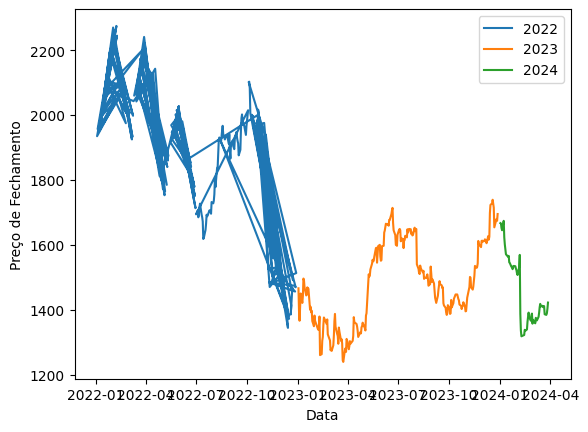

In [505]:
# ## 2. Visualização da Série Temporal

# Gráfico de linhas para o preço de fechamento
plt.plot(df_2022['Data'], df_2022['Preco_Fechamento'], label='2022')
plt.plot(df_2023['Data'], df_2023['Preco_Fechamento'], label='2023')
plt.plot(df_2024['Data'], df_2024['Preco_Fechamento'], label='2024')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

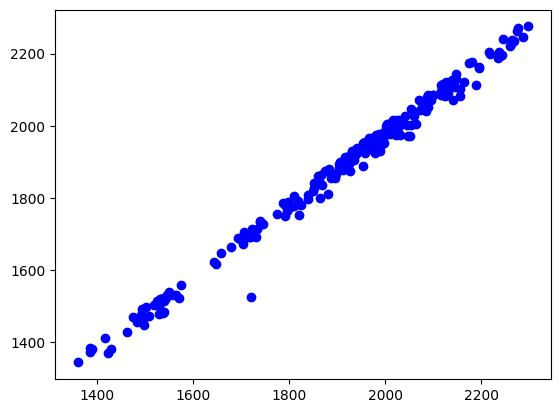

In [506]:
# Gráfico de dispersão: Preço de Abertura vs. Preço de Fechamento
plt.scatter(df_2022['Preco_Abertura'], df_2022['Preco_Fechamento'], c='b', label='2022')
plt.scatter

In [507]:
df_train = pd.concat([df_2022, df_2023])

In [508]:
df_train.dropna(inplace=True)

In [509]:
window_size = 5
df_train['Data'] = df_train['Preco_Fechamento'].rolling(window=window_size).mean()

# Aplique o modelo ARIMA
model = ARIMA(df_train['Data'], order=(3,0,8))
model_fit = model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

In [510]:
forecast = model_fit.forecast(steps=len(df_2024))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


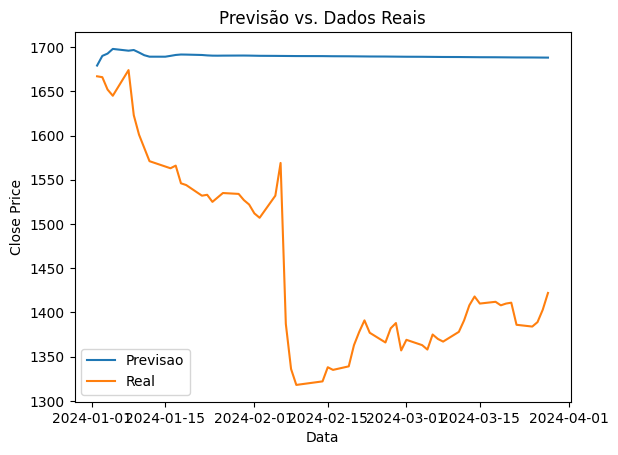

In [511]:
# Compare as previsões com os dados reais de 2024
plt.plot(df_2024['Data'], forecast, label='Previsao')
plt.plot(df_2024['Data'], df_2024['Preco_Fechamento'], label='Real')
plt.xlabel('Data')
plt.ylabel('Close Price')
plt.title('Previsão vs. Dados Reais')
plt.legend()
plt.show()

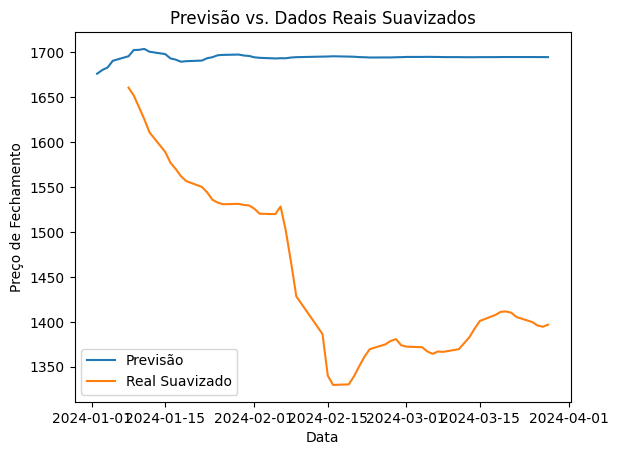

In [481]:
df_2024['Smoothed_Close'] = df_2024['Preco_Fechamento'].rolling(window=window_size).mean()

# Compare as previsões com os dados reais de 2024
plt.plot(df_2024['Data'], forecast, label='Previsão')
plt.plot(df_2024['Data'], df_2024['Smoothed_Close'], label='Real Suavizado')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão vs. Dados Reais Suavizados')
plt.legend()
plt.show()